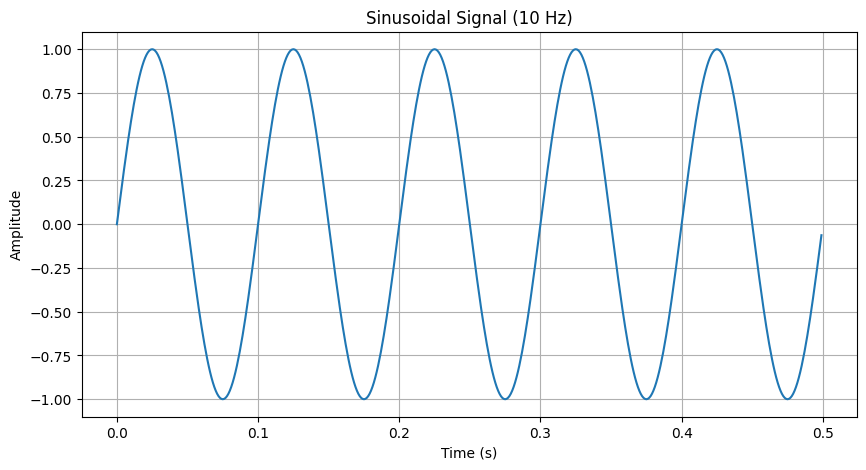

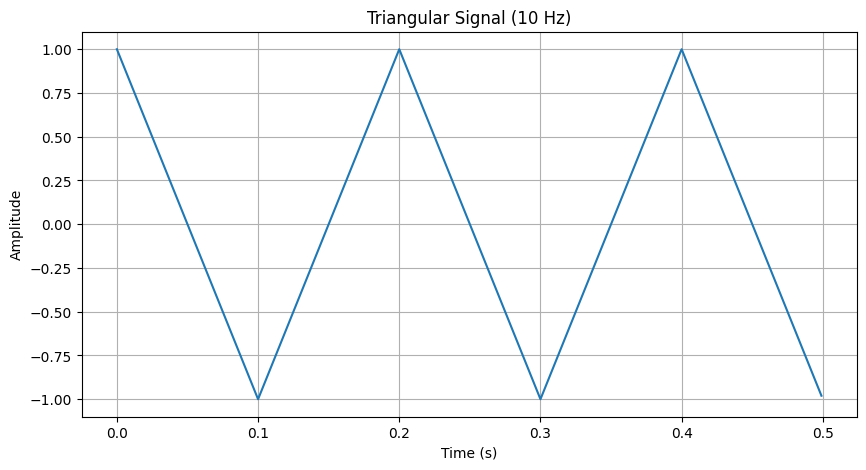

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 5 * (1 / 10), 1 / fs)  # Time vector for 5 cycles
x_sin = np.sin(2 * np.pi * 10 * t)  # 10 Hz sinusoidal signal

# Plot sinusoidal signal
plt.figure(figsize=(10, 5))
plt.plot(t, x_sin)
plt.title('Sinusoidal Signal (10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Generate triangular signal
x_tri = 2 * np.abs(((t * 10) % 2) - 1) - 1  # 10 Hz triangular signal

# Plot triangular signal
plt.figure(figsize=(10, 5))
plt.plot(t, x_tri)
plt.title('Triangular Signal (10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


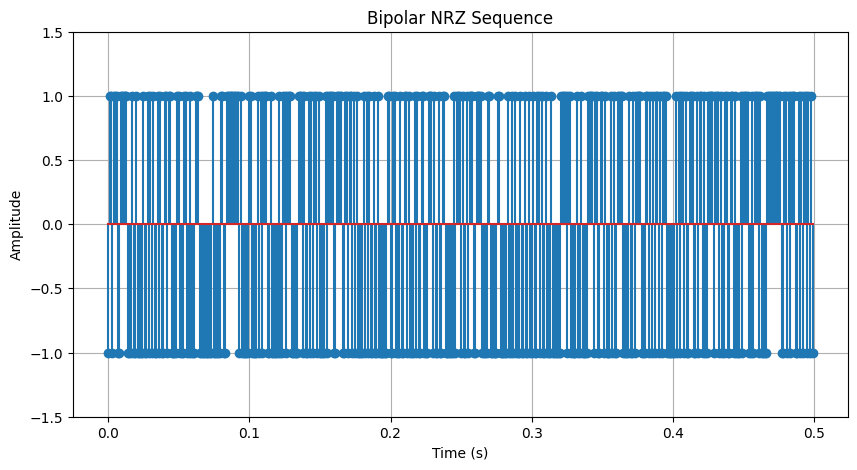

In [2]:
# Generate bipolar NRZ sequence
bits = np.random.randint(0, 2, size=len(t)) * 2 - 1  # Random binary sequence {-1, 1}

# Plot binary sequence
plt.figure(figsize=(10, 5))
plt.stem(t, bits, use_line_collection=True)
plt.title('Bipolar NRZ Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()


In [3]:
mux_signal = np.vstack((x_sin, x_tri, bits))

In [4]:
# Add AWGN noise
variances = [0.001, 0.01, 0.1, 1, 10]
received_signals = []
for var in variances:
    noise = np.random.normal(0, np.sqrt(var), mux_signal.shape)
    received_signals.append(mux_signal + noise)


ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

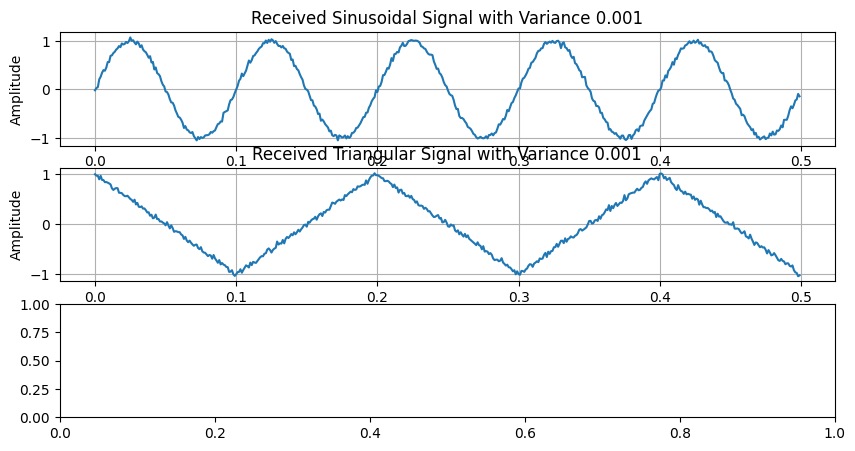

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the same parameters from the transmitter
fs = 1000  # Sampling frequency
t = np.arange(0, 5 * (1 / 10), 1 / fs)  # Time vector for 5 cycles

# Assuming received_signals is the list of received signals from the channel

# Receiver
for i, (received_signal, var) in enumerate(zip(received_signals, variances)):
    # Demultiplexing
    x_sin_received = received_signal[0]
    x_tri_received = received_signal[1]
    bits_received = received_signal[2]

    # Regenerate binary NRZ pulse
    bits_received = np.sign(bits_received)

    # Reconstruct using LPF (simple averaging)
    reconstructed_signal = np.mean(bits_received, axis=0)

    # Plot received signal
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.plot(t, x_sin_received)
    plt.title(f'Received Sinusoidal Signal with Variance {var}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(t, x_tri_received)
    plt.title(f'Received Triangular Signal with Variance {var}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(t, reconstructed_signal)
    plt.title(f'Received Binary NRZ Signal with Variance {var}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

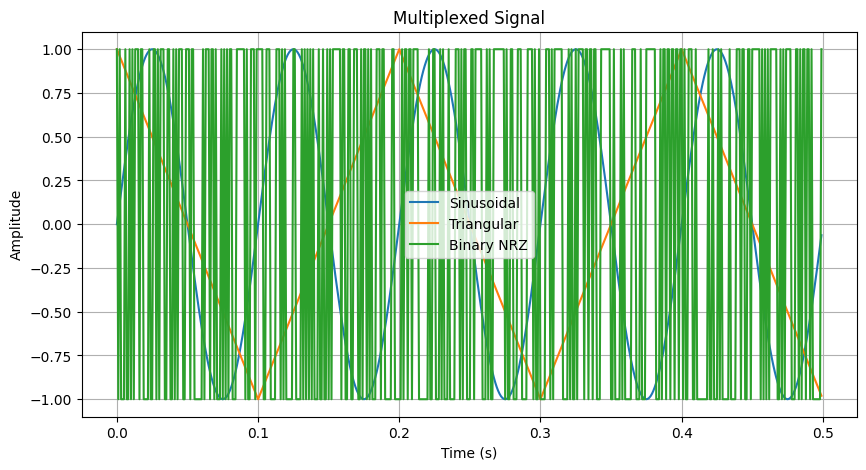

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 5 * (1 / 10), 1 / fs)  # Time vector for 5 cycles
x_sin = np.sin(2 * np.pi * 10 * t)  # 10 Hz sinusoidal signal

# Generate triangular signal
x_tri = 2 * np.abs(((t * 10) % 2) - 1) - 1  # 10 Hz triangular signal

# Generate bipolar NRZ sequence
bits = np.random.randint(0, 2, size=len(t)) * 2 - 1  # Random binary sequence {-1, 1}

# Time multiplexing
mux_signal = np.vstack((x_sin, x_tri, bits))

# Plot multiplexed signal
plt.figure(figsize=(10, 5))
plt.plot(t, mux_signal.T)
plt.title('Multiplexed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Sinusoidal', 'Triangular', 'Binary NRZ'])
plt.grid(True)
plt.show()
